In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
        
# Dataset: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [27]:
# Config
pd.options.display.max_rows = 10
pd.set_option("min_rows", 20)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns',None)

path = './data'
# print(os.listdir(path))

songs = pd.read_csv(path+'/merge.csv')
# songs["duration_s"] = songs.duration_ms.apply(lambda x : round(x/1000))
# songs.drop("duration_ms", axis=1, inplace=True)
print(songs)

                          id                                            title  \
0     7iN1s7xHE4ifF5povM6A48                      Let It Be - Remastered 2009   
1     6QhXQOpyYvbpdbyjgAqKdY                                          Cecilia   
2     2BhrrVRC8CoiWejbzj0VjQ                            Son of a Preacher Man   
3     3Bh6uInhcVBVvLraGZdkKD                             Who'll Stop The Rain   
4     6UkMcAA19lTdjs22jtB7o2                                  Big Yellow Taxi   
5     5LxvwujISqiB8vpRYv887S                                  I Want You Back   
6     0NgFZWdvnv218PVnY4I8UT  Instant Karma! (We All Shine On) - Ultimate Mix   
7     50q2aUjWoTn6CJIfSPRJQA                   (They Long To Be) Close To You   
8     2eF8pWbiivYsYRpbntYsnc            Signed, Sealed, Delivered (I'm Yours)   
9     5Ts1DYOuouQLgzTaisxWYh              Love Grows (Where My Rosemary Goes)   
...                      ...                                              ...   
4790  1000nHvUdawXuUHgBod4Wv

In [8]:
# Standard Pitch Class notation, e.g. 0 = C, 1 = C♯/D♭, 2 = D, etc. If no key was detected, the value is -1.
print('Common keys: \n', songs['key'].value_counts().sort_values(ascending=False))

# Artists with multiple appearances
artists = songs['primary_artist'].value_counts()
print('Common artists: \n', artists.sort_values(ascending=False))

# Some artist's popularity over the years

# Group sth with some features and sort with valence
# def group_by_features(group, features):
#     # unpack categories
#     return songs[group, features].groupby(group).mean().sort_values(by='valence', ascending=False)[:10]

# print(group_by_features('genre', ('valence', 'key')))

Common keys: 
 0     576
7     504
9     489
1     481
2     452
5     419
11    405
4     376
10    322
8     320
6     319
3     137
Name: key, dtype: int64
Common artists: 
 Michael Jackson         29
Madonna                 28
Rihanna                 28
Elton John              27
Drake                   24
Queen                   22
Taylor Swift            22
ABBA                    21
Eminem                  21
Britney Spears          19
                        ..
Alexandra Stan           1
Diddy - Dirty Money      1
Bad Meets Evil           1
Maxwell                  1
Two Door Cinema Club     1
Travie McCoy             1
Iyaz                     1
Don Omar                 1
Stromae                  1
Freya Ridings            1
Name: primary_artist, Length: 1897, dtype: int64


In [9]:
songs.info()
songs.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4800 non-null   object 
 1   title             4800 non-null   object 
 2   primary_artist    4800 non-null   object 
 3   all_artists       4800 non-null   object 
 4   danceability      4800 non-null   float64
 5   energy            4800 non-null   float64
 6   key               4800 non-null   int64  
 7   loudness          4800 non-null   float64
 8   mode              4800 non-null   int64  
 9   speechiness       4800 non-null   float64
 10  acousticness      4800 non-null   float64
 11  instrumentalness  4800 non-null   float64
 12  liveness          4800 non-null   float64
 13  valence           4800 non-null   float64
 14  tempo             4800 non-null   float64
 15  time_signature    4800 non-null   int64  
 16  duration_s        4800 non-null   int64  


,count,mean,std,min,25%,50%,75%,max
danceability,4800.0,0.630908,0.147346,0.135000,0.539000,0.644000,0.734000,0.980
energy,4800.0,0.663262,0.189208,0.026400,0.534750,0.686000,0.817000,0.996
key,4800.0,5.306875,3.603180,0.000000,2.000000,5.000000,9.000000,11.000
loudness,4800.0,-7.941893,3.454099,-24.709000,-10.088500,-7.247000,-5.304500,-0.140
mode,4800.0,0.662500,0.472906,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,4800.0,0.071971,0.075093,0.022500,0.032700,0.043100,0.071825,0.911
acousticness,4800.0,0.199933,0.226299,0.000005,0.026075,0.106000,0.305000,0.978
instrumentalness,4800.0,0.028952,0.118180,0.000000,0.000000,0.000009,0.000961,0.985
liveness,4800.0,0.173598,0.141214,0.015000,0.083575,0.119000,0.223000,0.989
valence,4800.0,0.597184,0.240588,0.038100,0.410000,0.615500,0.800000,0.989


Average tempo by primary_artists:
                     tempo
primary_artist            
MoKenStef           64.979
Freya Ridings       67.016
Bobby McFerrin      68.837
Tom Walker          68.976
Jeffrey Osborne     69.199
King Princess       71.912
Minnie Riperton     72.029
U.S.A. For Africa   72.580
Stanley Clarke      72.764
Champaign           73.286
...                    ...
Lumidee            199.958
Billy Paul         200.813
Climax             201.467
Mustard            202.015
Charles & Eddie    202.408
Steve Perry        203.753
Blake Shelton      205.570
Carole King        208.282
John Waite         208.571
The Nolans         210.654

[1897 rows x 1 columns]
Average tempo by years:
Average duration_s by years:
Average liveness by years:


<AxesSubplot:title={'center':'Liveness changes over year'}, xlabel='year'>

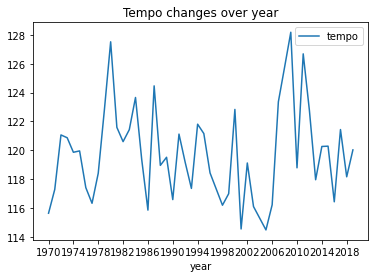

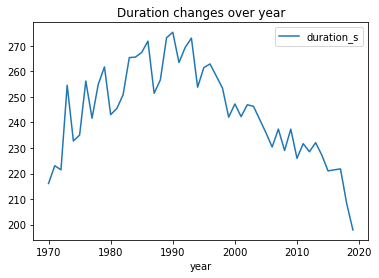

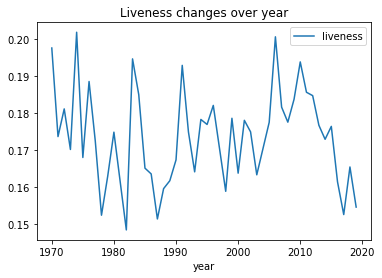

In [13]:
# explicit = songs[(songs['explicit'] == True)]
# print('Tracks with explicit content: \n', explicit)

def get_average_x_by_y(x, y, sort):
    print('Average', str(x), 'by', str(y)+'s:',)
    if (sort==True):
        return (songs.groupby([y]).agg({str(x):'mean'})).sort_values(x)
    return (songs.groupby([y]).agg({str(x):'mean'}))

# print(get_average_x_by_y('tempo', 'genre', True))
print(get_average_x_by_y('tempo', 'primary_artist', True))

tempo_by_years = get_average_x_by_y('tempo', 'year', False)
tempo_by_years.plot(title="Tempo changes over year", xticks=range(1970, 2020, 4))

duration_by_years = get_average_x_by_y('duration_s', 'year', False)
duration_by_years.plot(title="Duration changes over year")

liveness_by_years = get_average_x_by_y('liveness', 'year', False)
liveness_by_years.plot(title="Liveness changes over year")

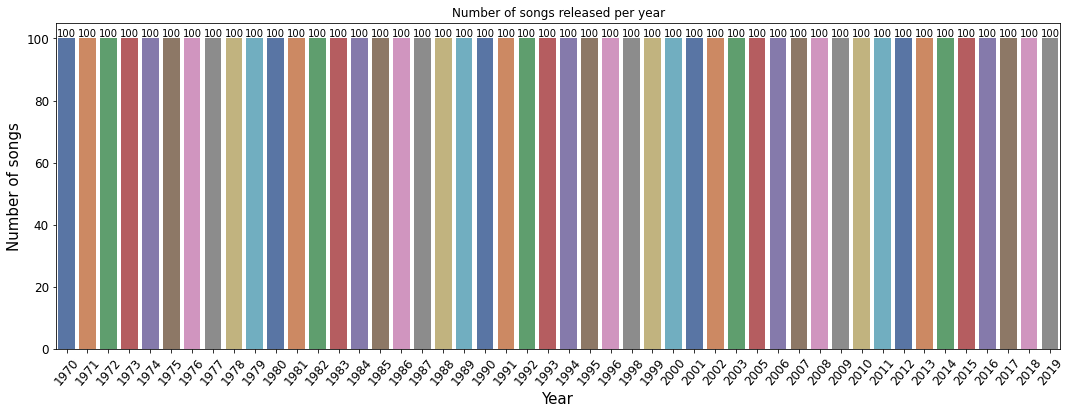

In [17]:
# # Number of songs over years
# songs_per_year = (songs.year.value_counts().rename_axis('year').reset_index(name = 'songs'))

# plt.figure(figsize=(18,6))
# ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
# plt.ylabel('Number of songs', size = 15)
# plt.xlabel('Year', size = 15)
# plt.title('Number of songs released per year')
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12, rotation = 50)
# ax.bar_label(ax.containers[0],size = 10)

# plt.show()

# # Bar chart of keys
# # Pie Chart: explicit, mode


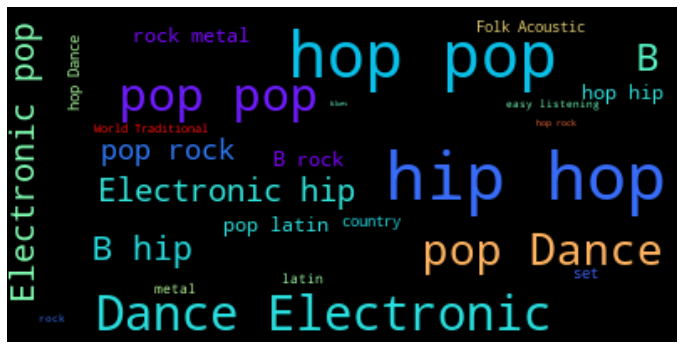

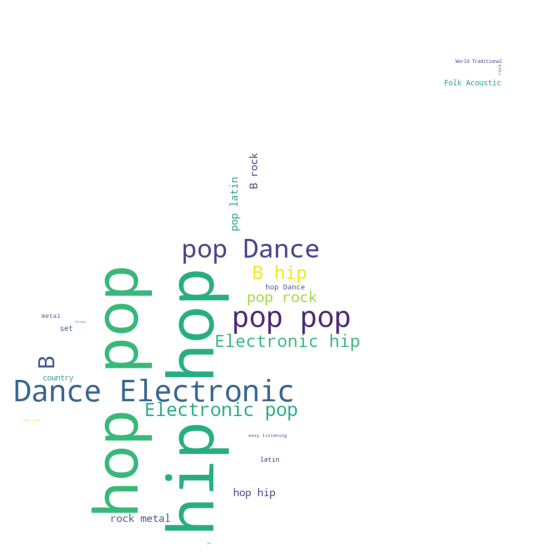

In [7]:
# # Explore data about pop with scatterplot
# pop = []

# for i in range (0,2000):
#     if songs.iloc[i]["genre"] == "pop":
#         pop.append(songs.iloc[i]["artist"])

# pop = np.array(pop)
# pop.shape
# sns.scatterplot(x="popularity", y="duration_s", data=songs)

# Wordcloud of genres (https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5)
from matplotlib import rcParams
genre_list = songs['genre'].to_list()

# https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/
genres = ' '.join(map(str,genre_list))

rcParams['figure.figsize'] = (12,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='black', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# Image wordcloud
from PIL import Image
mask = np.array(Image.open('./mask_guitar.png'))
wordcloud = WordCloud(background_color='white', max_words=200,
                     mask=mask).generate(genres)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:>

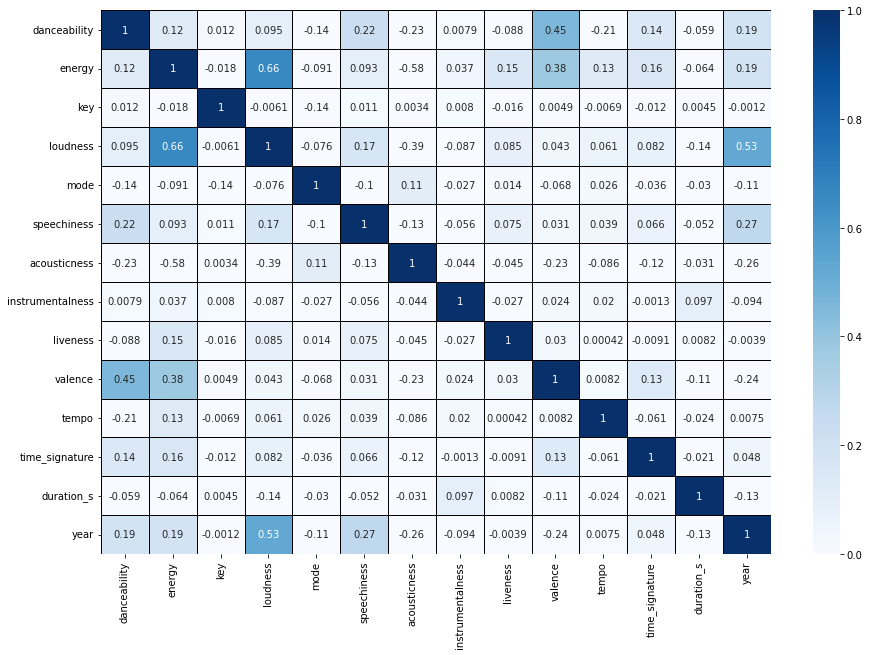

In [21]:
# Correlation between features demonstrated in heatmap
features = songs.drop(["primary_artist", "title"], axis=1)
corr = features.corr()
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black', annot=True)

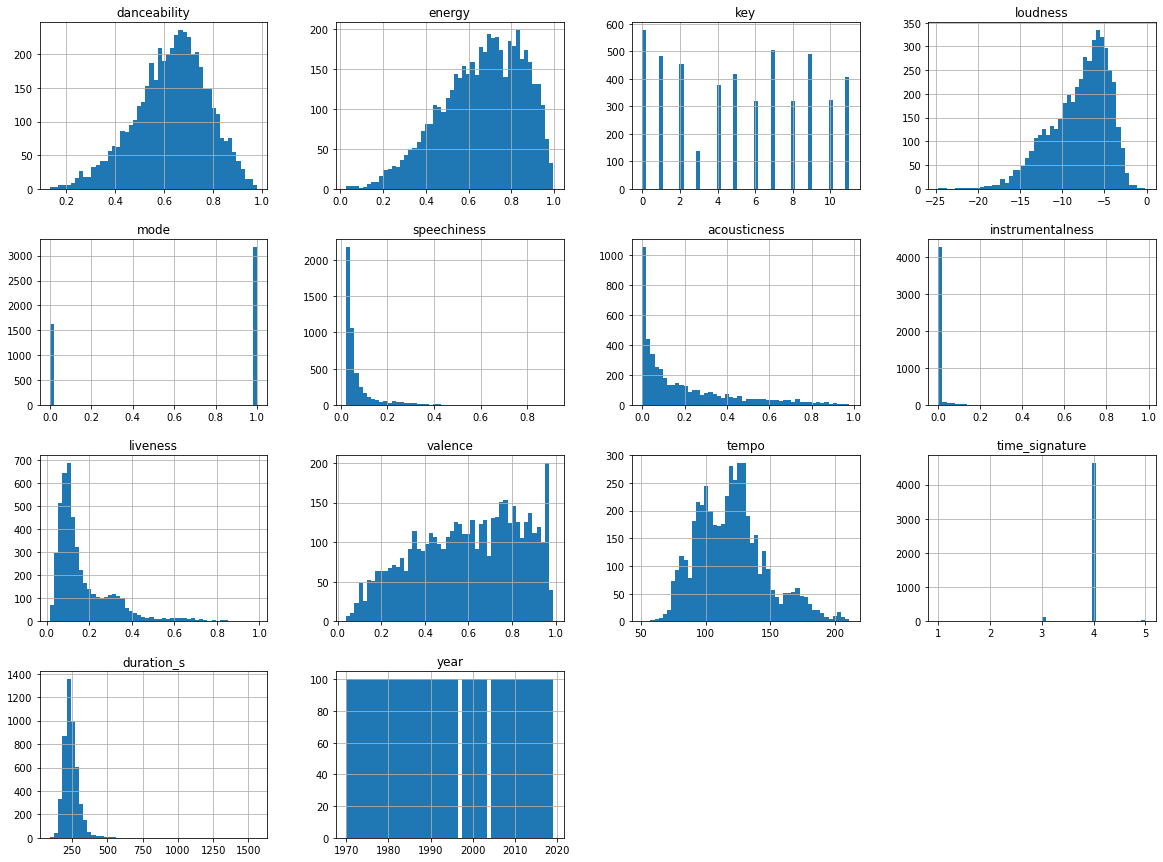

In [22]:
# Histogram for quantifiable features

# fig, axes = plt.subplots(len(songs.columns), 1)
# plt.figure(figsize=(12,12))
# # https://stackoverflow.com/questions/57602524/print-multiple-separate-histograms-in-one-loop
# for column in songs.columns:
#     i = songs.columns.get_loc(column)
#     a = np.array(songs.iloc[:, i])
#     if(songs[column].dtypes == np.int64 or songs[column].dtypes == np.float64):
#         print('Histogram for', column)
#         axes[i].hist(a) 

songs.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 0, 'Average popularity')

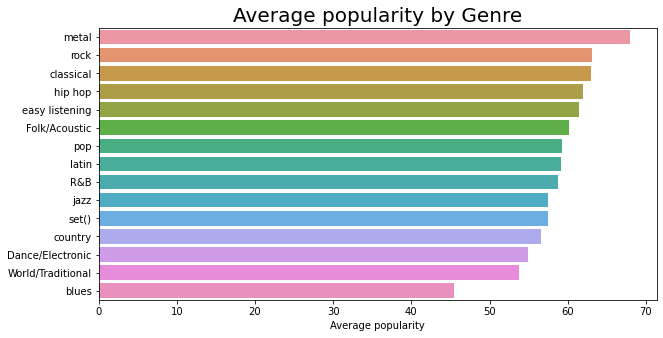

In [10]:
# Explode the genre column
songs.genre = songs.genre.apply(lambda x: x.split(", "))
df_genre_exp = songs.explode("genre")

# Craft "genres" DataFrame
genre_cols = df_genre_exp.columns.values[4:-1] #From popularity to duration_s
genre_cols = np.append(genre_cols, ["explicit"])
genres = df_genre_exp.groupby("genre")[genre_cols].mean().reset_index()
#See results
genres.head()

# Popularity by genres
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x="popularity", y="genre",
                  data=genres.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

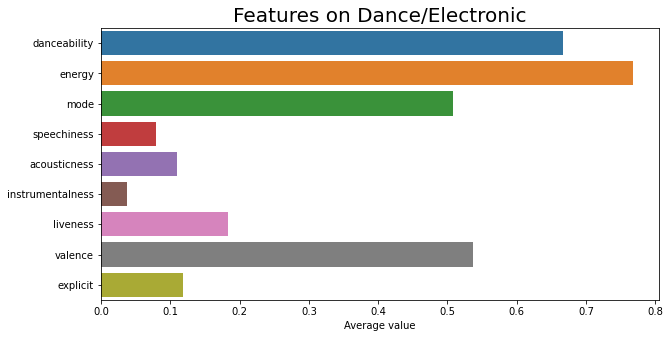

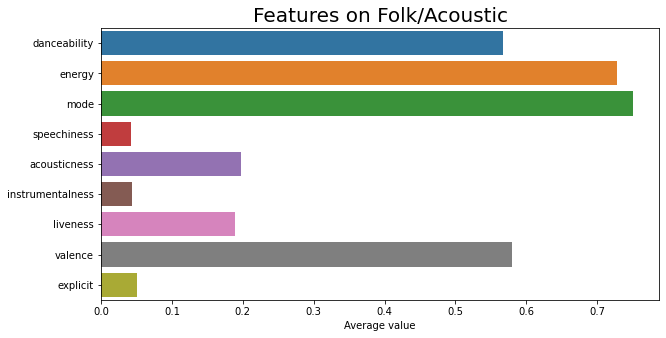

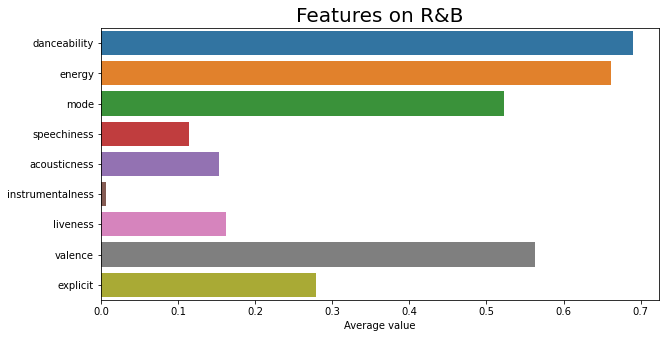

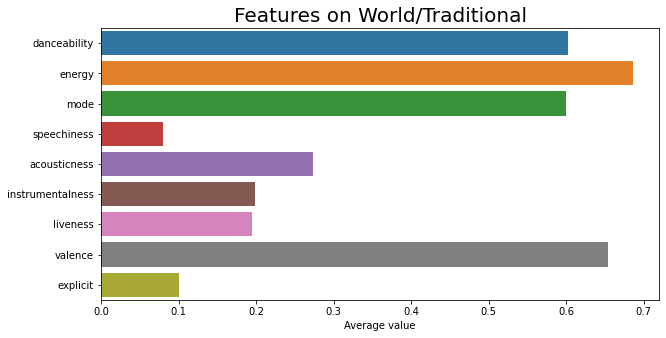

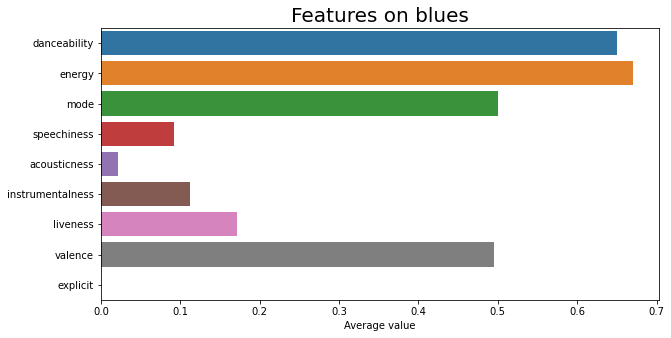

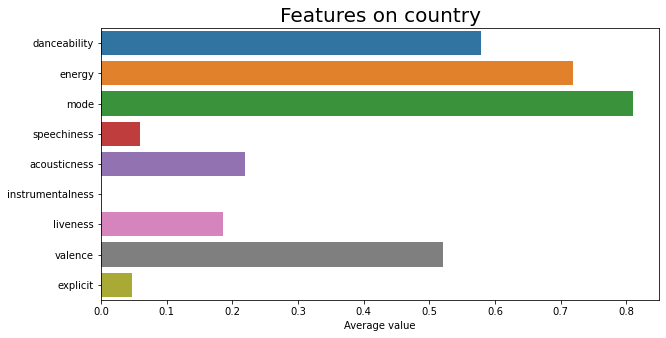

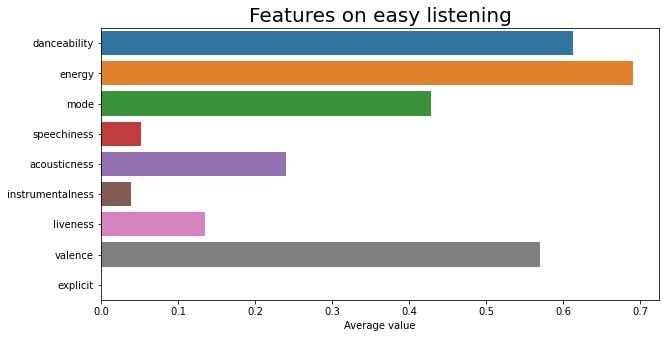

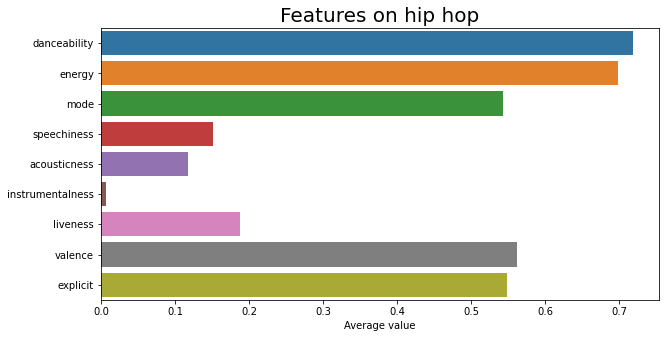

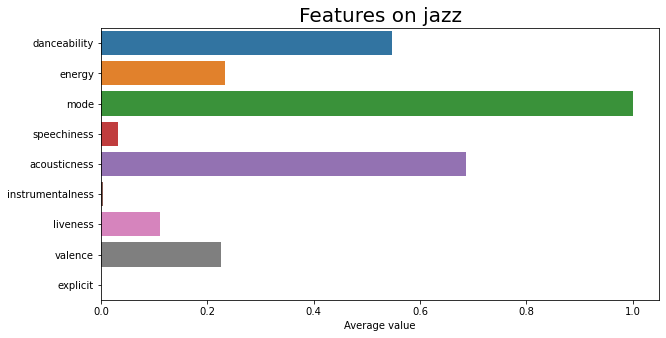

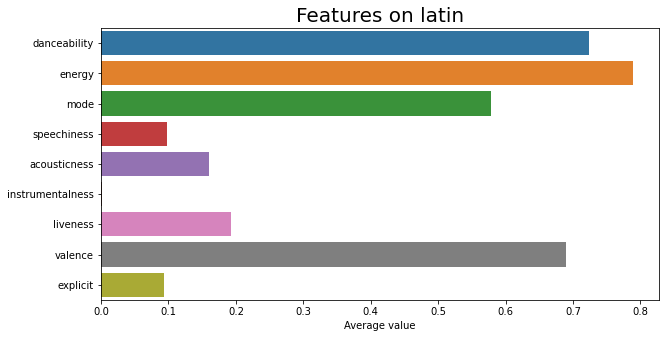

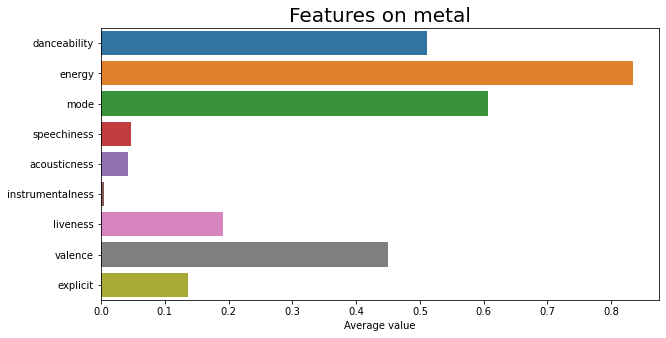

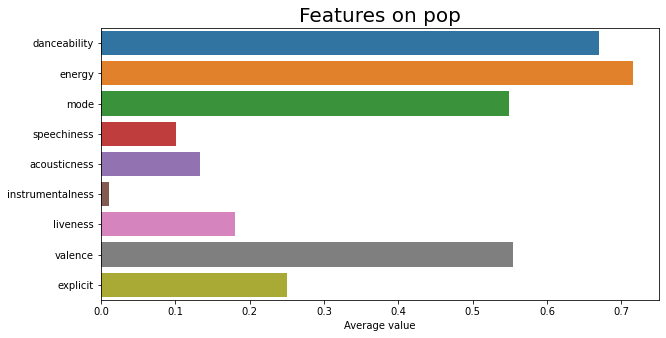

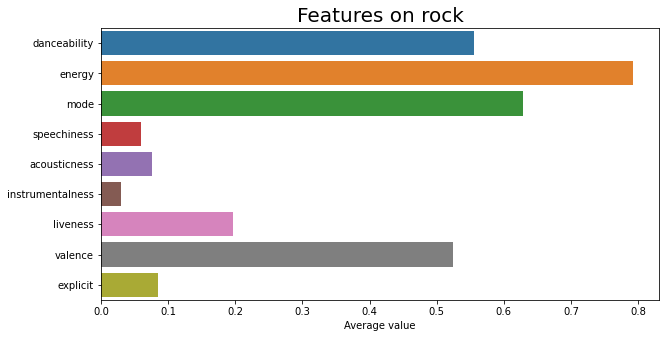

In [11]:
#Average features by genre
#Exclude "classical" and "set()"
genre_num_songs = df_genre_exp.groupby("genre").size().reset_index()
genre_num_songs.columns = ["genre", "songs"]
genre_num_songs.drop(genre_num_songs[genre_num_songs.genre.isin(["classical", "set()"])].index.values, inplace=True)
valid_genres = genre_num_songs.genre.values

for genre in valid_genres:
    data = genres.drop(["popularity"], axis=1)[genres.genre == genre]
    #Exclude features with different scales
    data = data.drop(["genre", "tempo",
                      "key", "loudness"], axis=1).transpose().reset_index()
    data.columns = ["feature", "value"]
    
    # Consider features on each genre
    plt.clf()
    ax = sns.barplot(x="value", y="feature", data=data)
    ax.set_xlabel("Average value")
    ax.set_ylabel("")
    ax.set_title("Features on " + genre, fontsize=20)
    
    plt.show()

In [15]:
import nltk
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

!pip install nltk textblob 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pgmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
sia.polarity_scores("Today is a  day.")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [9]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

blob = TextBlob("This restaurant was great, but I'm not sure if I'll go there again.")
blob.sentiment

blobber = Blobber(analyzer=NaiveBayesAnalyzer())

blob = blobber("This restaurant was great, but I'm not sure if I'll go there again.")
blob.sentiment

Sentiment(classification='pos', p_pos=0.5879425317005774, p_neg=0.41205746829942275)

In [13]:
pd.set_option("display.max_colwidth", 200)

df = pd.DataFrame({'content': [
    "I love love love love this kitten",
    "I hate hate hate hate this keyboard",
    "I'm not sure how I feel about toast",
    "Did you see the baseball game yesterday?",
    "The package was delivered late and the contents were broken",
    "Trashy television shows are some of my favorites",
    "I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",
    "I find chirping birds irritating, but I know I'm not the only one",
]})

def get_scores(content):
    blob = TextBlob(content)
    nb_blob = blobber(content)
    sia_scores = sia.polarity_scores(content)
    
    return pd.Series({
        'content': content,
        'textblob': blob.sentiment.polarity,
        'textblob_bayes': nb_blob.sentiment.p_pos - nb_blob.sentiment.p_neg,
        'nltk': sia_scores['compound'],
    })

scores = df.content.apply(get_scores)
scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)


,content,textblob,textblob_bayes,nltk
0,I love love love love this kitten,0.500000,-0.087933,0.957100
1,I hate hate hate hate this keyboard,-0.800000,-0.214151,-0.941300
2,I'm not sure how I feel about toast,-0.250000,0.394659,-0.241100
3,Did you see the baseball game yesterday?,-0.400000,0.613050,0.000000
4,The package was delivered late and the contents were broken,-0.350000,-0.574270,-0.476700
5,Trashy television shows are some of my favorites,0.000000,0.040076,0.421500
6,"I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",0.800000,0.717875,-0.629600
7,"I find chirping birds irritating, but I know I'm not the only one",-0.200000,0.257148,-0.250000


In [23]:
!pip install text2emotion
!pip install emoji==1.6.3 
# https://github.com/aman2656/text2emotion-library/issues/10
# https://github.com/carpedm20/emoji/issues/221
import text2emotion as te

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5c873b0defb754f5c9183c6babfdaf43a5e0794869c3e514e3a8900679c58b5a
  Stored in directory: c:\users\pgmin\appdata\local\pip\cache\wheels\e5\c7\b3\b62b7809b5ea6d22241a713d9cc05741d7edaec674b9d61cb7
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.1.0
    Uninstalling emoji-2.1.0:
      Successfully uninstalled emoji-2.1.0


In [24]:
text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."
te.get_emotion(text)

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'